In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage

## Reading the Dataset and Preprocessing

In [36]:
wine_data = pd.read_csv("Wine_clust .csv")

In [37]:
wine_data

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [38]:
wine_data.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [39]:
wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


In [40]:
wine_data = wine_data.drop(['categorical_feature_encoded'], axis=1, errors='ignore')

In [41]:
# Standardizing the numerical features

scaler = StandardScaler()
scaled_data = scaler.fit_transform(wine_data)

# ---------- KMeans Clustering ----------

In [42]:
# Using the Elbow Method to find the optimal number of clusters for KMeans

wcss = []  # Within-Cluster-Sum-of-Squares

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)


C:\Users\USER\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\USER\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\USER\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\USER\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows wi

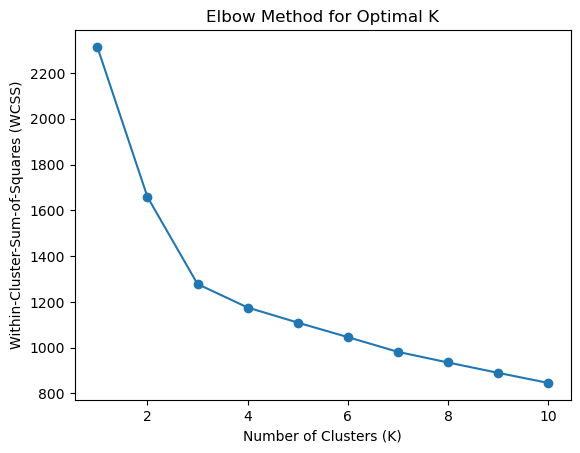

In [43]:
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Within-Cluster-Sum-of-Squares (WCSS)')
plt.show()

In [44]:
# Choosing the optimal K(number of clusters)
optimal_k = 3

### Perform KMeans clustering with the optimal number of clusters

In [45]:
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
wine_data['kmeans_cluster'] = kmeans.fit_predict(scaled_data)

C:\Users\USER\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\USER\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


# ---------- Agglomerative Clustering ----------

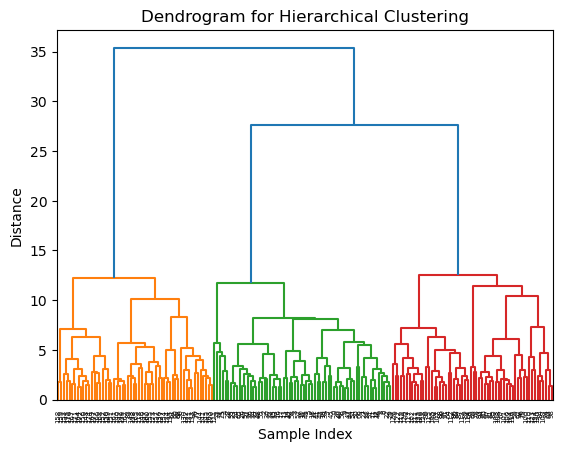

In [46]:
# Using dendrogram to find the optimal number of clusters for Agglomerative clustering

linkage_matrix = linkage(scaled_data, 'ward')
dendrogram(linkage_matrix)
plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

In [47]:
# Choosing the optimal number of clusters
optimal_clusters_agg = 3

### Perform Agglomerative clustering with the optimal number of clusters

In [48]:
agg_clustering = AgglomerativeClustering(n_clusters=optimal_clusters_agg)
wine_data['agg_cluster'] = agg_clustering.fit_predict(scaled_data)

# ---------- DBSCAN Clustering ----------

In [49]:
# Choosing parameters for DBSCAN (epsilon and min_samples)
eps = 1.5
min_samples = 5


### Perform DBSCAN clustering

In [50]:

dbscan = DBSCAN(eps=eps, min_samples=min_samples)
wine_data['dbscan_cluster'] = dbscan.fit_predict(scaled_data)

In [77]:
# Show the number of clusters created by DBSCAN

num_clusters = len(np.unique(wine_data['dbscan_cluster']))
print(f"Number of clusters created by DBSCAN: {num_clusters}")

Number of clusters created by DBSCAN: 1


### Print the resulting DataFrame

In [56]:
wine_data.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,kmeans_cluster,agg_cluster,dbscan_cluster
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,2,2,-1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,2,2,-1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,2,2,-1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,2,2,-1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,2,2,-1


## Visualizing the clustering results

In [71]:
plt.figure(figsize=(15, 5))

<Figure size 1500x500 with 0 Axes>

<Figure size 1500x500 with 0 Axes>

# KMeans Clustering

Text(0, 0.5, 'Malic Acid')

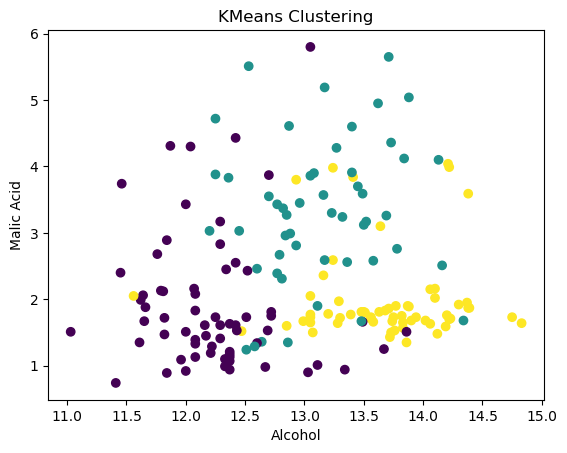

In [75]:
plt.scatter(wine_data['Alcohol'], wine_data['Malic_Acid'], c=wine_data['kmeans_cluster'], cmap='viridis')
plt.title('KMeans Clustering')
plt.xlabel('Alcohol')
plt.ylabel('Malic Acid')

# Agglomerative / Hierarchical Clustering

Text(0, 0.5, 'Malic Acid')

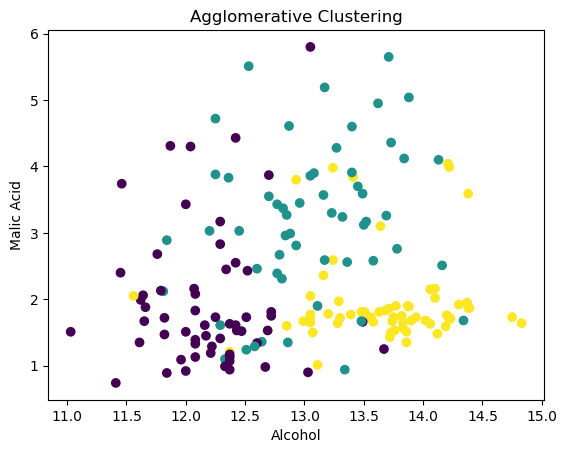

In [76]:
plt.scatter(wine_data['Alcohol'], wine_data['Malic_Acid'], c=wine_data['agg_cluster'], cmap='viridis')
plt.title('Agglomerative Clustering')
plt.xlabel('Alcohol')
plt.ylabel('Malic Acid')

# DBSCAN Clustering

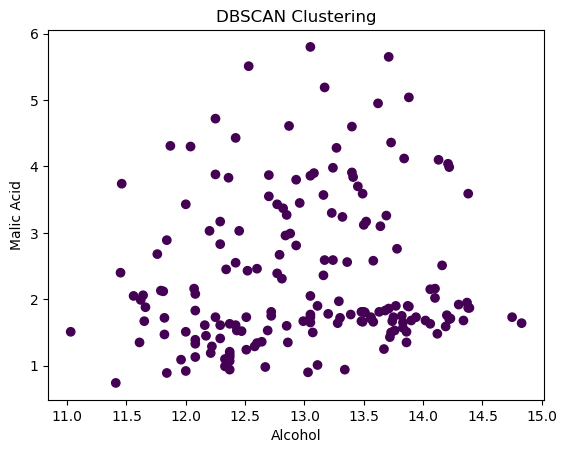

In [78]:
plt.scatter(wine_data['Alcohol'], wine_data['Malic_Acid'], c=wine_data['dbscan_cluster'], cmap='viridis')
plt.title('DBSCAN Clustering')
plt.xlabel('Alcohol')
plt.ylabel('Malic Acid')
plt.show()